In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import compCNN2

Using TensorFlow backend.


# Initialization

In [6]:
# initialize parameters
img_x, img_y = 28, 28 # for mnist we have 28x28 images
batch_size = 10
epochs = 5
num_classes = 10

nb_out_chan = 8
kernel_size = (10, 10)

trainX, trainY, testX, testY, input_shape = compCNN2.mnistData(img_x, img_y, num_classes)

smallIdx = int(trainX.shape[0]*0.01)
smallTrainX = trainX[:smallIdx,:,:,:]
smallTrainY = trainY[:smallIdx]

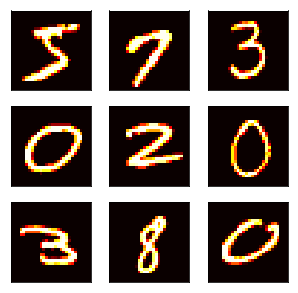

In [109]:
plt.figure(figsize=(5, 5))
for i, ind in enumerate([0, 15, 50, 156, 159, 210, 250, 300, 489]):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    img = plt.imshow(smallTrainX[ind, :, :, 0], cmap = "hot")

In [7]:
# Define the model with a given architecture
CNNModel = compCNN2.arch1(input_shape, num_classes, nb_out_chan, kernel_size)
print(CNNModel.summary())

# train the model
CNNModel.fit(smallTrainX, smallTrainY, batch_size, epochs)

# evaluate the model performance
compCNN2.evalModel(CNNModel, testX, testY, batch_size)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 8)         808       
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 8)         112       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        2336      
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 32)        56        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
__________

# Convolutional layer 1

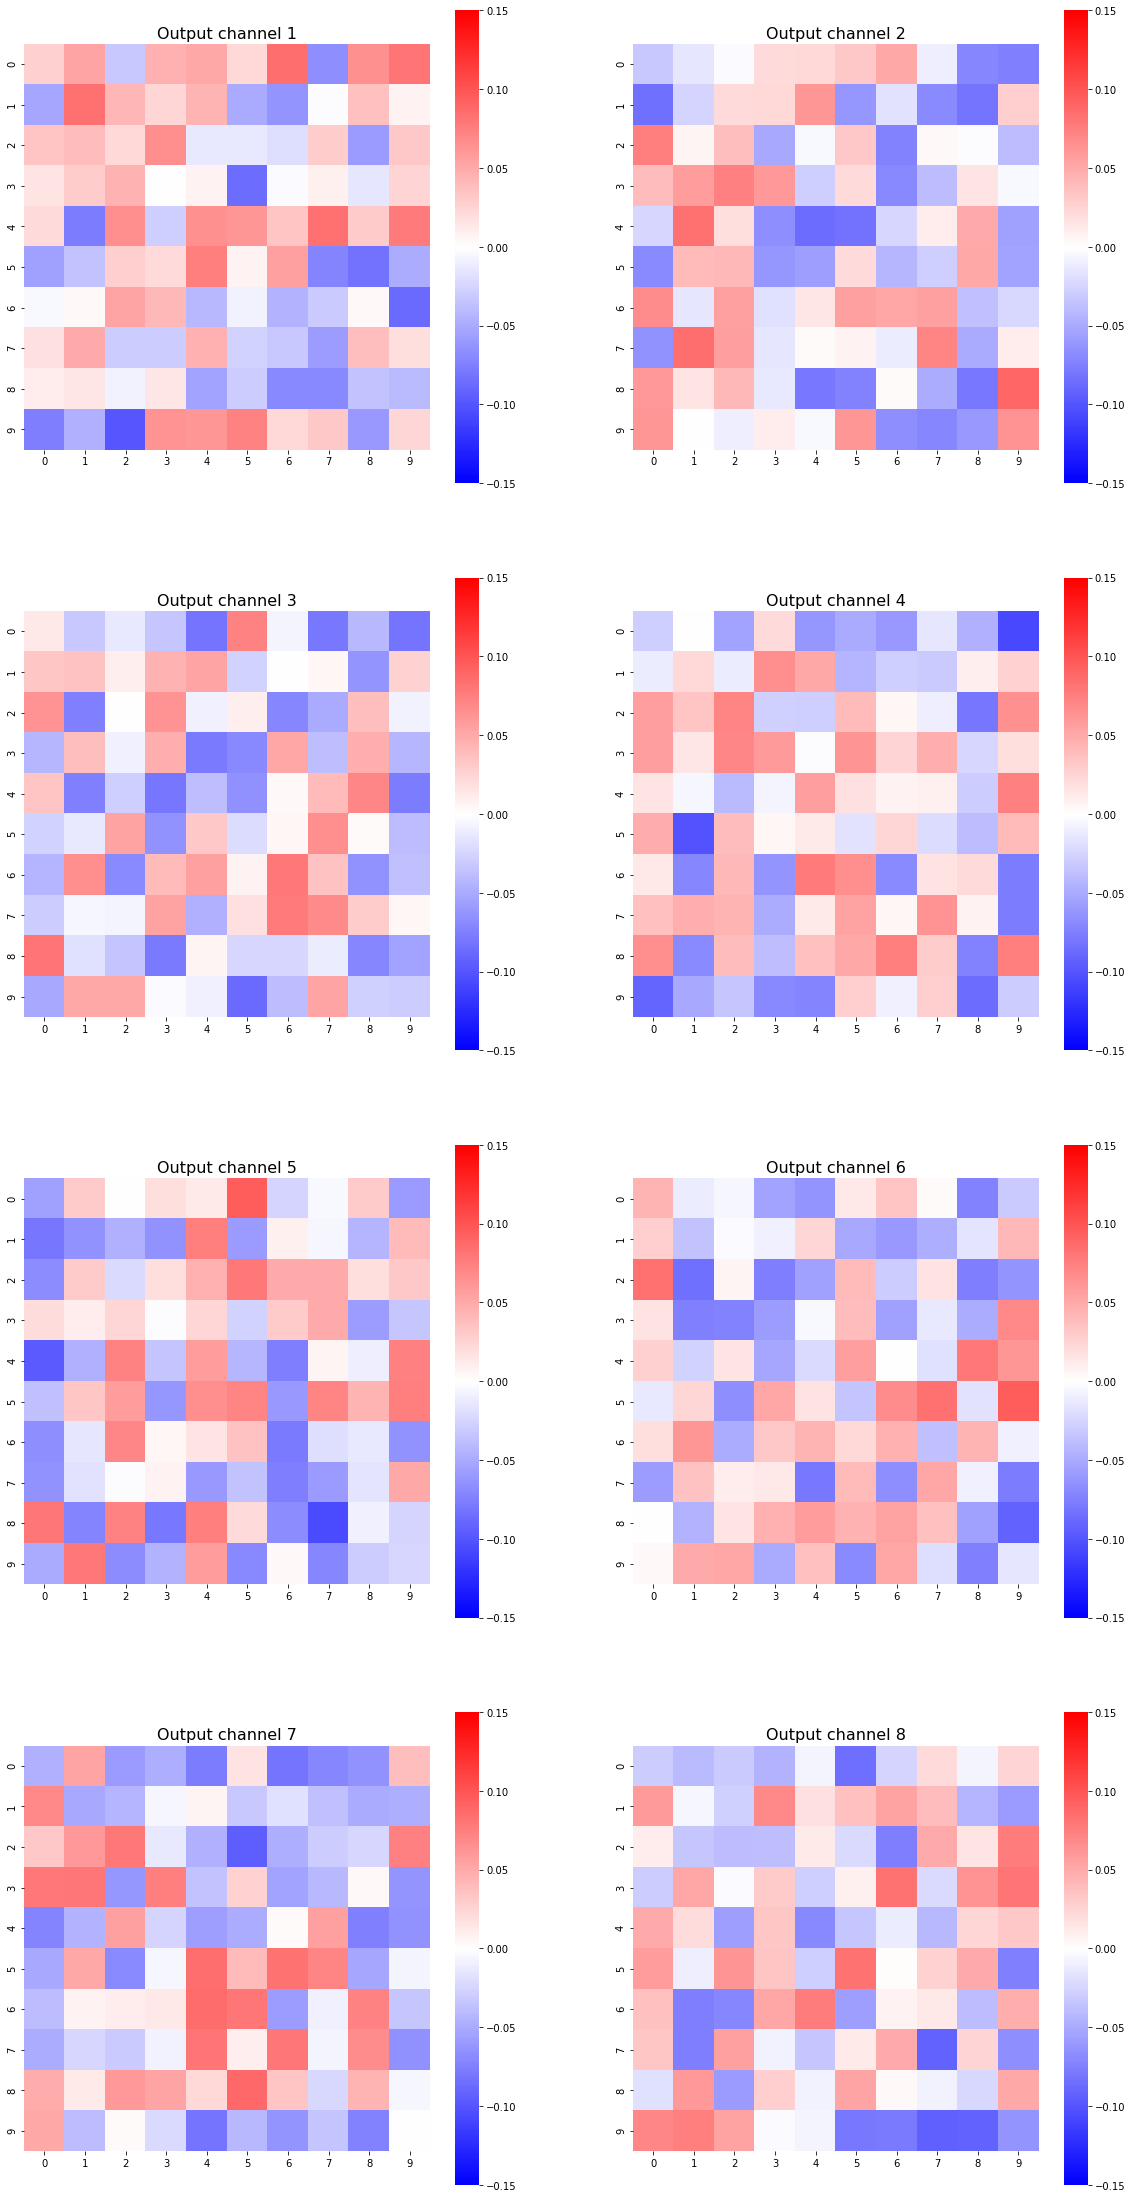

In [13]:
conv_layer1 = CNNModel.get_layer(index=0)
filter1 = conv_layer1.get_weights()[0] # Weights of the 1st convolution layer (without the bias)
chan1 = filter1.shape[3] # Number of output channels in convolution layer 1

fig = plt.figure(figsize=(20, 40))
sub_vert = (chan1+1)/2
sub_hori = 2
for i in range(chan1):
    ax = fig.add_subplot(sub_vert, sub_hori, i+1)
    ax.set_title("Output channel {}".format(i+1), fontsize=16)
    sns.heatmap(filter1[:, :, 0, i], vmin=-0.15, vmax=0.15, center=0, square=True, cmap="bwr")
    #print("Output channel {}: Sum = {}, Standard deviation = {}".format(i+1, filter1[:, :, 0, i].sum(),
    #      filter1[:, :, 0, i].std()))

# Convolutional layer 2

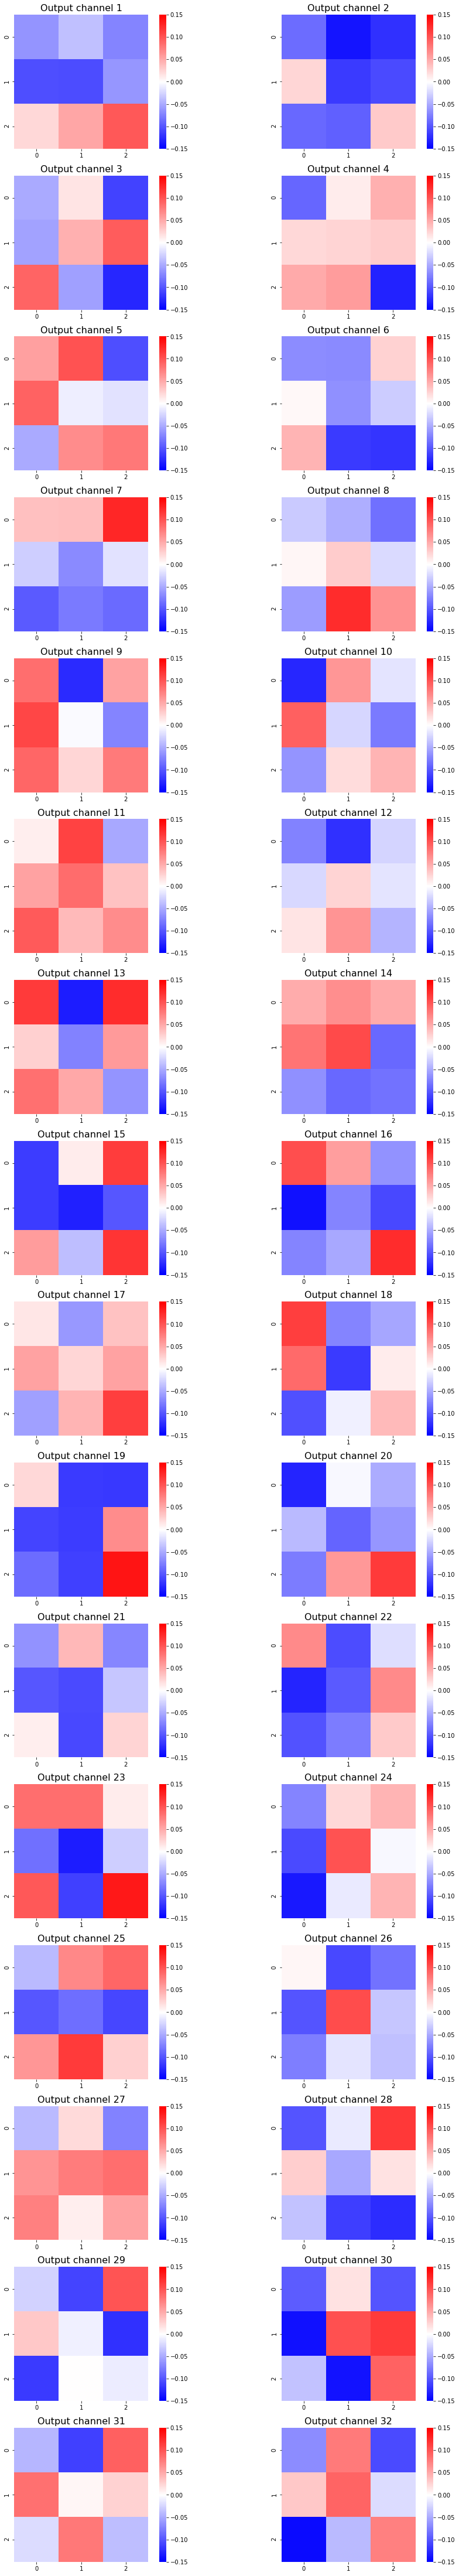

In [16]:
conv_layer2 = CNNModel.get_layer(index=3)
filter2 = conv_layer2.get_weights()[0] # Weights of the 2st convolution layer (without the bias)
chan2 = filter2.shape[3] # Number of output channels in convolution layer 1

fig = plt.figure(figsize=(15, 80))
sub_vert = (chan2+1)/2
sub_hori = 2
for i in range(chan2):
    ax = fig.add_subplot(sub_vert, sub_hori, i+1)
    ax.set_title("Output channel {}".format(i+1), fontsize=16)
    sns.heatmap(filter2[:, :, 0, i], vmin=-0.15, vmax=0.15, center=0, square=True, cmap="bwr")
    #print("Output channel {}: Sum = {}, Standard deviation = {}".format(i+1, filter1[:, :, 0, i].sum(),
    #      filter1[:, :, 0, i].std()))